In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings(
  'ignore'
)

In [2]:
X, y_true = make_blobs(
  n_samples=500,
  centers=3,
  cluster_std=0.60,
  random_state=42
)

X.shape, y_true.shape

((500, 2), (500,))

In [3]:
X

array([[-6.1900632 , -7.30201545],
       [ 3.02174685,  1.94059276],
       [ 5.9537606 ,  1.48819071],
       [-2.74446251,  8.13617716],
       [ 5.36060719,  1.72832446],
       [ 5.13808033,  1.45951939],
       [-5.34357647, -6.93774553],
       [ 4.80215293,  1.94302682],
       [ 3.99930658,  1.88774199],
       [-7.25451834, -6.86445496],
       [ 4.25193511,  1.32424088],
       [-1.81404028,  8.52187674],
       [-1.2293776 ,  7.84303345],
       [-2.16666332,  9.69562551],
       [ 4.81374375,  3.21841016],
       [ 5.27493353,  0.91792599],
       [-2.5524037 ,  9.61640587],
       [-7.5532604 , -6.65066375],
       [-6.8302568 , -6.24082137],
       [-3.17299861,  8.29656215],
       [ 3.80073829,  2.31095123],
       [-2.38387947,  7.83848405],
       [ 4.98581301,  2.15991978],
       [-5.94031277, -6.91955975],
       [-7.14748736, -6.7636556 ],
       [ 4.87655012,  1.720579  ],
       [ 4.48689251,  2.87556548],
       [-6.4081471 , -6.62483506],
       [-6.71939703,

In [5]:
df = pd.DataFrame(
  X, columns=['Feature_1', 'Feature_2']
)
df

,Feature_1,Feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [6]:
sclaer = StandardScaler()
X_scaled = sclaer.fit_transform(df)

In [8]:
inertia = []
K_range = range(1, 15)

for k in K_range:
  kmeans = KMeans(
    n_clusters=k,
    random_state=42
  )
  
  kmeans.fit(X_scaled)
  
  inertia.append(kmeans.inertia_)
inertia

[1000.0000000000001,
 297.8954141051722,
 11.575484723104982,
 9.752067977356841,
 8.25717527244628,
 6.9175773204167985,
 6.334755391595289,
 5.704177177901429,
 5.060234133532077,
 4.762361898130397,
 4.342094321480358,
 4.1406887790628355,
 3.5208112437590002,
 3.305945481970615]

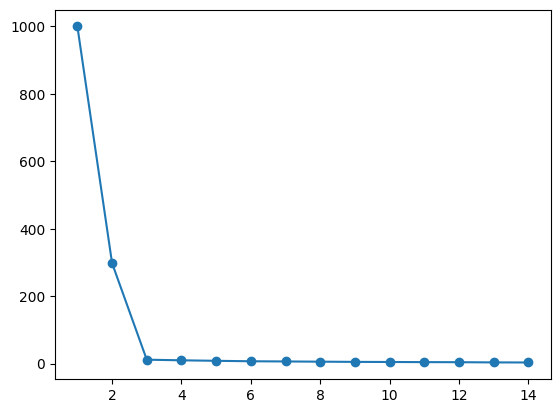

In [16]:
plt.plot(K_range, inertia, marker='o')
plt.savefig('Elbow_curve.png')
plt.show()

In [17]:
kmeans_final = KMeans(
  n_clusters=3,
  random_state=42
)

cluster_labels = kmeans_final.fit_predict(X_scaled)

In [18]:
df['cluster'] = cluster_labels

In [19]:
df

,Feature_1,Feature_2,cluster
0,-6.190063,-7.302015,1
1,3.021747,1.940593,0
2,5.953761,1.488191,0
3,-2.744463,8.136177,2
4,5.360607,1.728324,0
...,...,...,...
495,-6.040014,-6.325329,1
496,-2.555459,9.218977,2
497,4.438408,2.974583,0
498,-7.193261,-6.250704,1


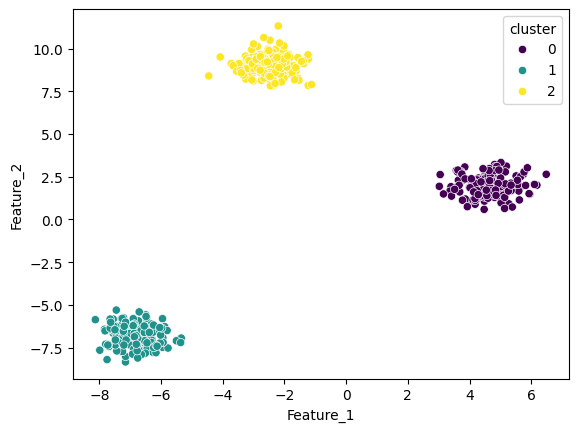

In [21]:
sns.scatterplot(
  x='Feature_1',
  y='Feature_2',
  hue='cluster',
  data=df,
  palette='viridis'
)

plt.savefig('CLuster.png')
plt.show()